In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
# Load data
iris = load_iris()

# Create kfolds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize range of kvalues, mean scores and times
k_vals = range(1, 20)
mean_scores = []
times = []

In [3]:
# Evaluate k neighborsm for each k value and the runtime values
for k in k_vals:
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, iris.data, iris.target, cv=kf)
    mean_scores.append(scores.mean())

    runtime = timeit.timeit(lambda: cross_val_score(knn, iris.data, iris.target, cv=kf), number=1)
    times.append(runtime)

In [4]:
# Best k value
best_k = k_vals[np.argmax(mean_scores)]
print(f"Best k value: {best_k}")
print(f"Cross-validation scores for different k values: {mean_scores}")

Best k value: 13
Cross-validation scores for different k values: [np.float64(0.96), np.float64(0.96), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9666666666666666), np.float64(0.9666666666666668), np.float64(0.9666666666666666), np.float64(0.9666666666666666)]


Text(0.5, 1.0, 'KNN Runtime vs k')

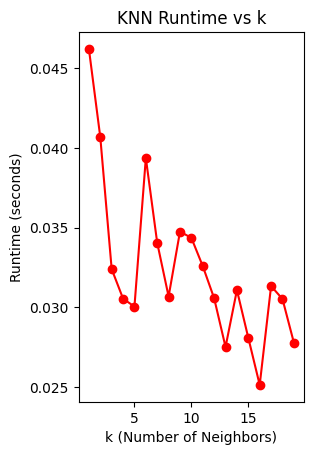

In [5]:
# Runtime vs k plot
plt.subplot(1, 2, 2)
plt.plot(k_vals, times, marker='o', color='red')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Runtime (seconds)')
plt.title('KNN Runtime vs k')